<a href="https://colab.research.google.com/github/stanislawWojtas/Przetwarzanie-Obraz-w-Cyfrowych/blob/main/02_point.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [ ]:
import cv2
import os
import requests
import numpy as npcha
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [ ]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

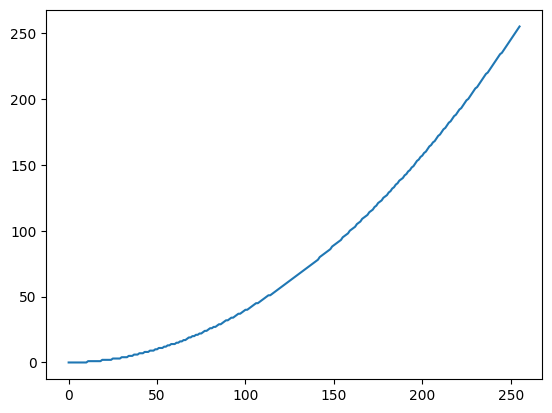

In [ ]:
import lut
plt.plot(lut.kwadratowa)

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [ ]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

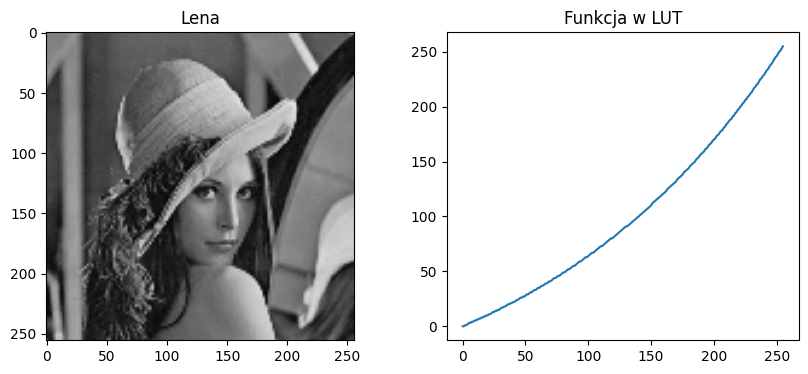

In [ ]:
lena = cv2.imread("lena.bmp")
jet = cv2.imread("jet.bmp")

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].imshow(lena)
ax[0].set_title("Lena")
ax[1].plot(lut.wykladnicza)
ax[1].set_title("Funkcja w LUT")

plt.show()

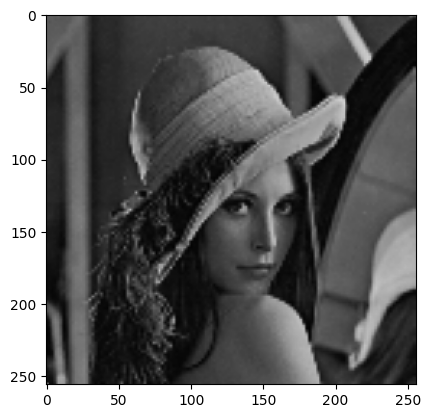

In [ ]:
lena_wyk = cv2.LUT(lena, lut.wykladnicza)
plt.imshow(lena_wyk)

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [ ]:
def LUT(img, lut_table):
  img_after_lut = cv2.LUT(img, lut_table)
  fig, ax = plt.subplots(1, 3, figsize=(12, 4))
  ax[0].imshow(img)
  ax[0].set_title("Originalny obraz")
  ax[1].plot(lut_table)
  ax[1].set_title("Wykres przekodowania")
  ax[2].imshow(img_after_lut)
  ax[2].set_title("Obraz przekształcony")

  plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

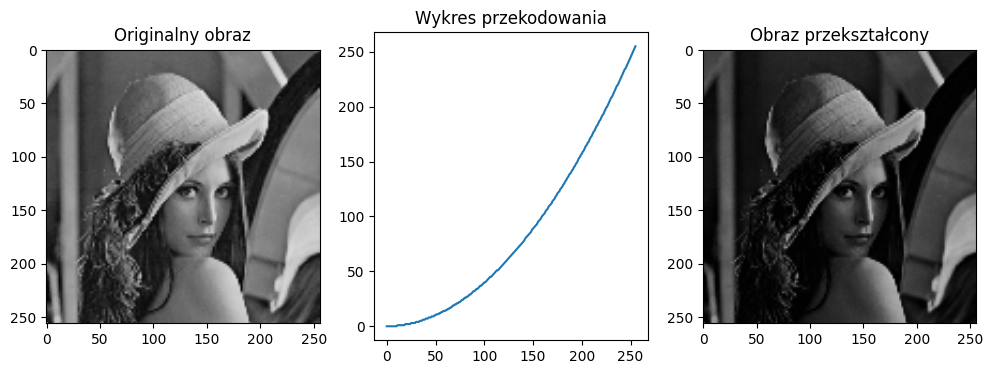

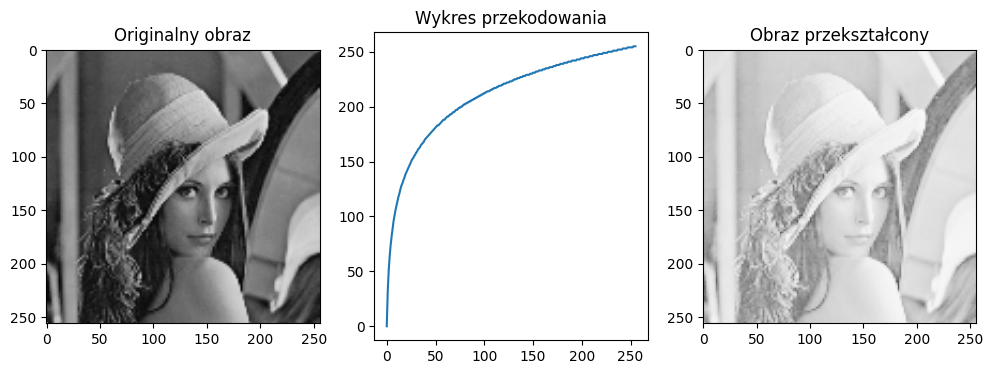

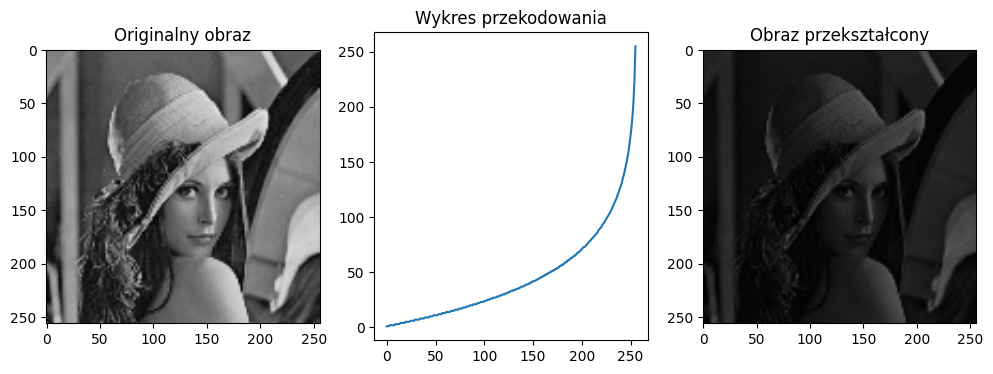

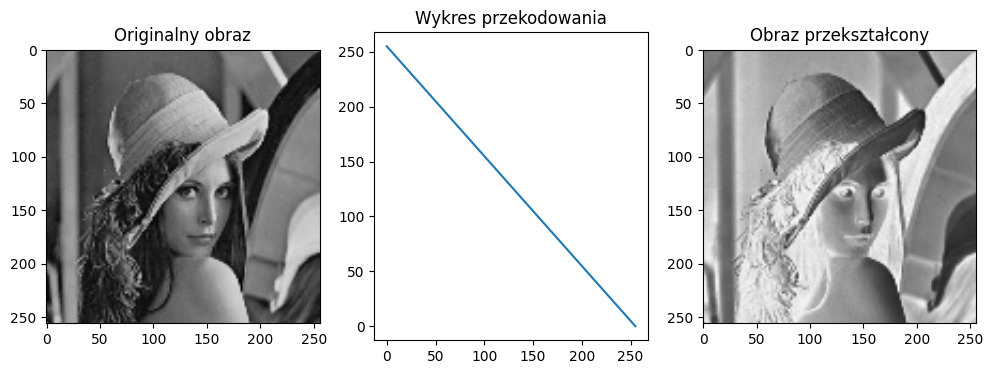

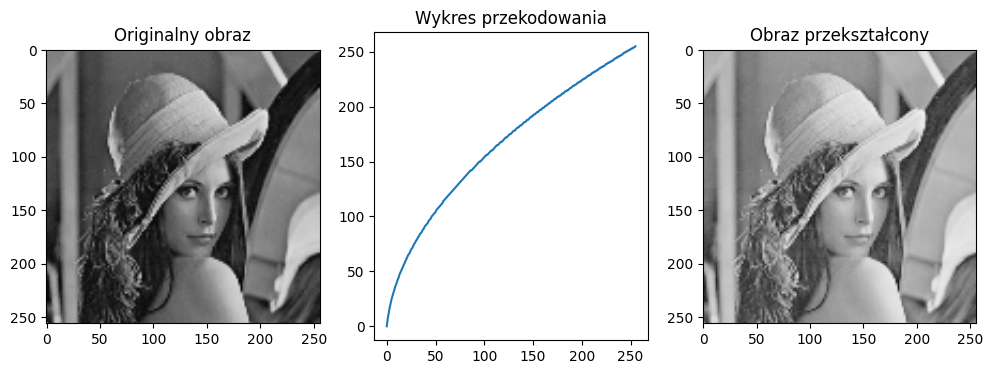

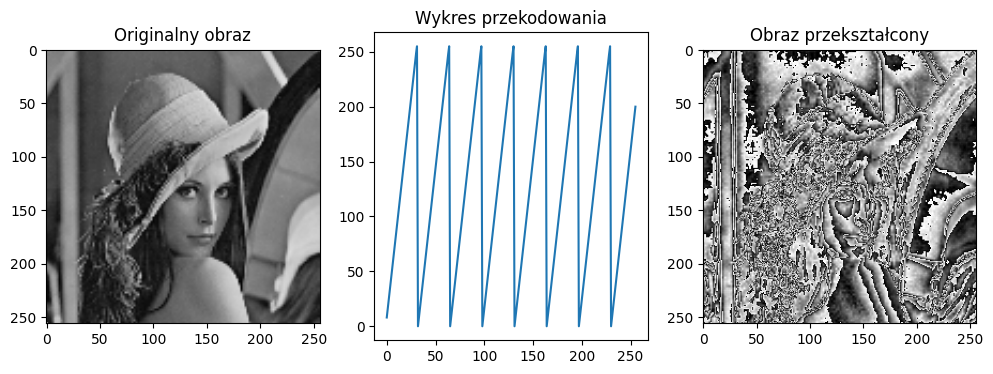

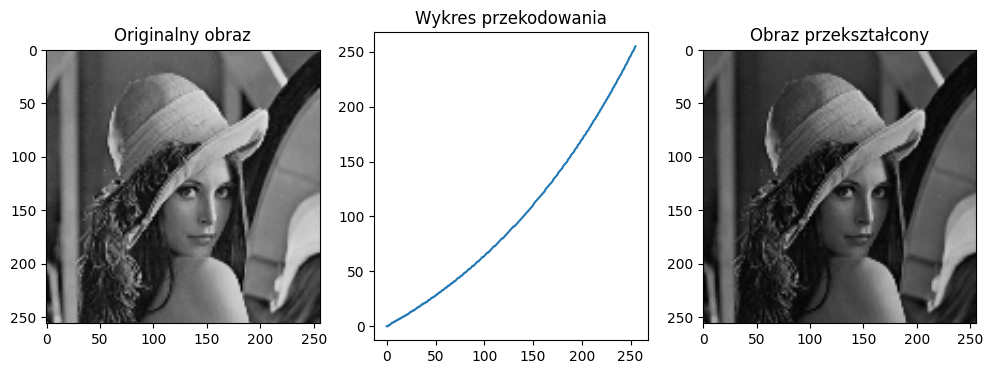

In [ ]:
LUT(lena, lut.kwadratowa)
LUT(lena, lut.log)
LUT(lena, lut.odwlog)
LUT(lena, lut.odwrotna)
LUT(lena, lut.pierwiastkowa)
LUT(lena, lut.pila)
LUT(lena, lut.wykladnicza)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

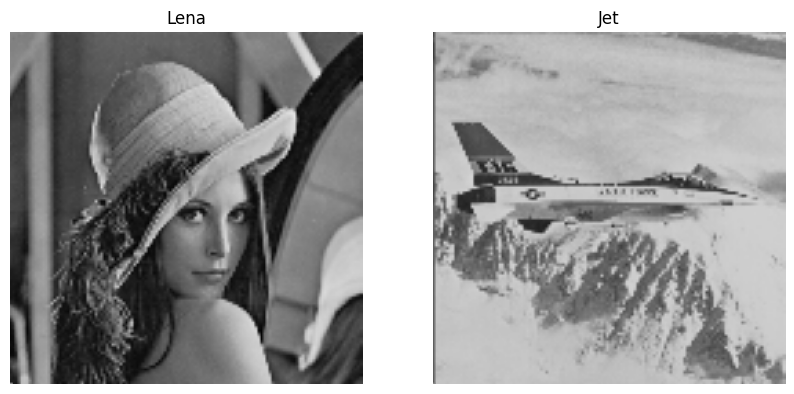

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].imshow(lena)
ax[0].set_title("Lena")
ax[0].axis("off")
ax[1].imshow(jet)
ax[1].set_title("Jet")
ax[1].axis("off")
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

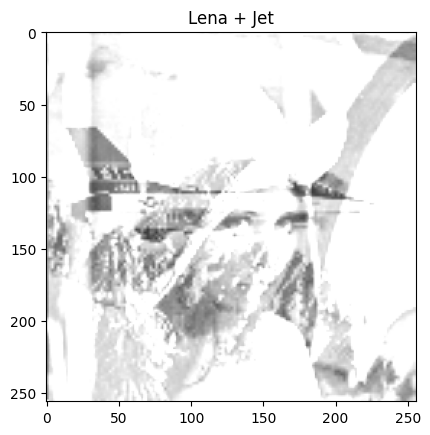

In [ ]:
lena_plus_jet = cv2.add(lena, jet)
plt.imshow(lena_plus_jet)
plt.title("Lena + Jet")
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

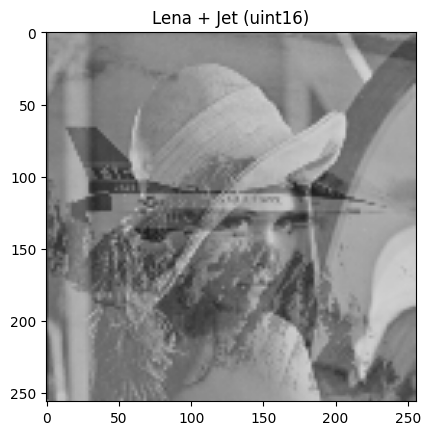

In [ ]:
# Dodawanie wykorzystując uint
lena_plus_jet_uint16 = (cv2.add(lena.astype('uint16'), jet.astype('uint16')) / 2).astype("uint8")
plt.imshow(lena_plus_jet_uint16)
plt.title("Lena + Jet (przeskalowane)")
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

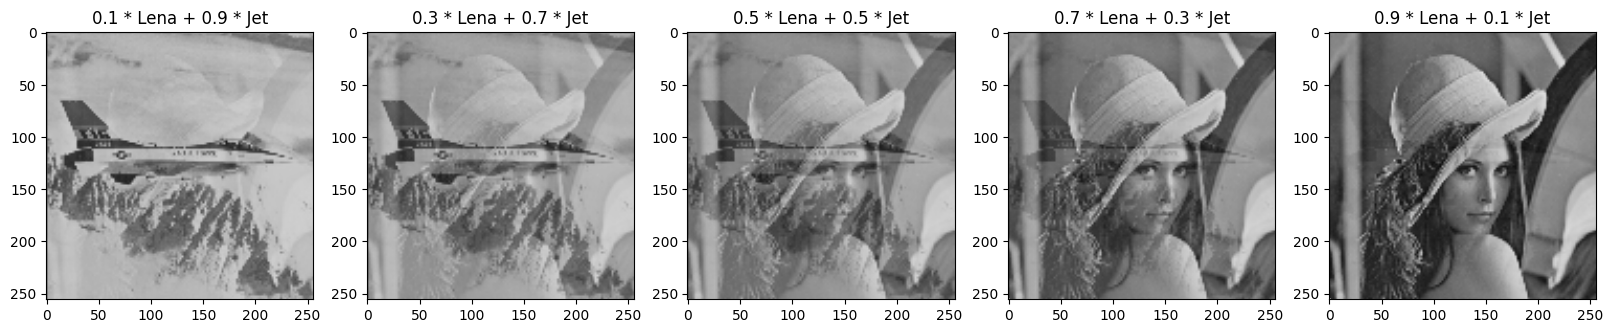

In [ ]:
alphas = [0.1, 0.3, 0.5, 0.7, 0.9]

fig, ax = plt.subplots(1, 5, figsize=(20, 30))

for i, alpha in enumerate(alphas):
  added = cv2.addWeighted(lena, alpha, jet, 1-alpha, 0)
  ax[i].imshow(added)
  ax[i].set_title(f"{round(alpha, 2)} * Lena + {(round(1- alpha, 2))} * Jet")
plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

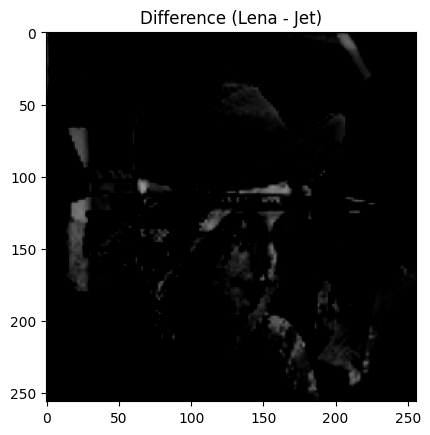

In [ ]:
lena_minus_jet = cv2.subtract(lena, jet)
plt.imshow(lena_minus_jet)
plt.title("Difference (Lena - Jet)")
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

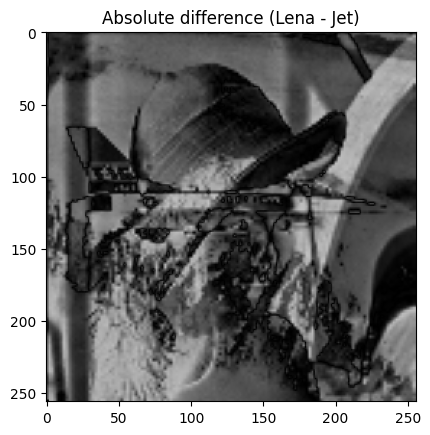

In [ ]:
import numpy as np

diff = cv2.subtract(lena.astype("int16"), jet.astype("int16"))
abs_diff = np.abs(diff).astype('uint8')

plt.imshow(abs_diff)
plt.title("Absolute difference (Lena - Jet)")
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

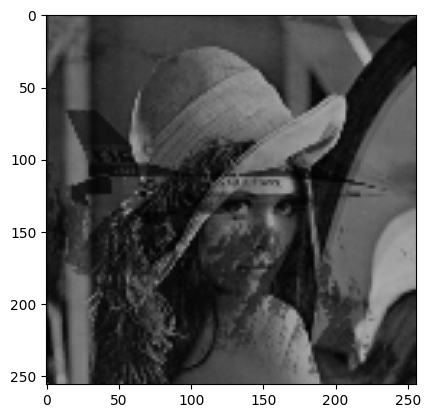

In [ ]:
multiplied = cv2.multiply(lena.astype("float64"), jet.astype("float64")) / 255.0
multiplied = multiplied.astype("uint8")

plt.imshow(multiplied)

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [ ]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Text(0.5, 1.0, 'Lena multiplied by mask')

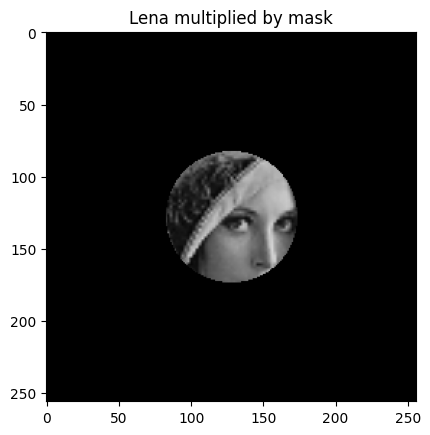

In [ ]:
mask = (cv2.imread("kolo.bmp")).astype('bool').astype('uint8')
after_mask = cv2.multiply(lena, mask)
plt.imshow(after_mask)
plt.title("Lena multiplied by mask")

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

Text(0.5, 1.0, 'Negatyw metodą bitwise_not')

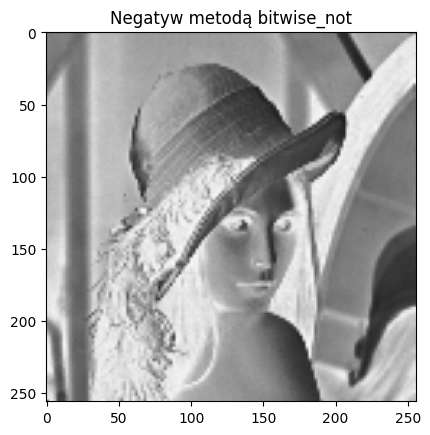

In [ ]:
neg = cv2.bitwise_not(lena)
plt.imshow(neg)
plt.title("Negatyw metodą bitwise_not")

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [ ]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

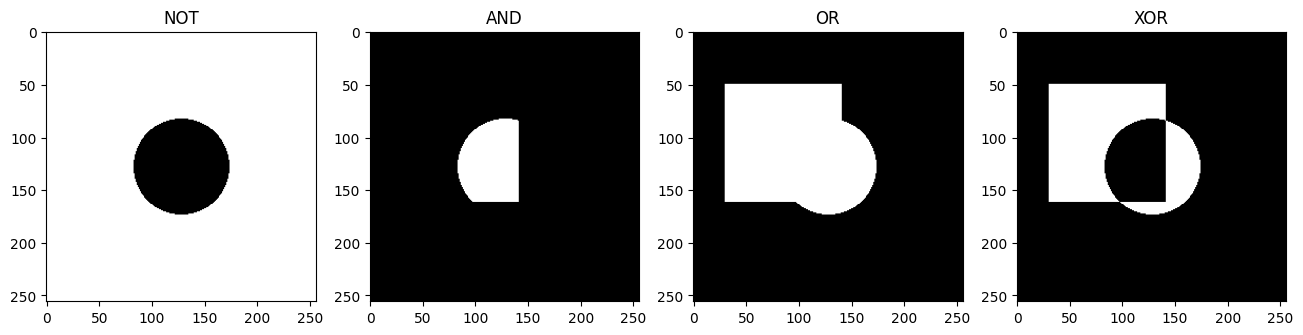

In [ ]:
kolo = cv2.imread("kolo.bmp")
kwadrat = cv2.imread("kwadrat.bmp")

fig, ax = plt.subplots(1, 4, figsize=(16, 4))

ax[0].imshow(cv2.bitwise_not(kolo), cmap='gray')
ax[0].set_title("NOT")

ax[1].imshow(cv2.bitwise_and(kolo, kwadrat), cmap='gray')
ax[1].set_title("AND")

ax[2].imshow(cv2.bitwise_or(kolo, kwadrat), cmap='gray')
ax[2].set_title("OR")

ax[3].imshow(cv2.bitwise_xor(kolo, kwadrat), cmap='gray')
ax[3].set_title("XOR")

plt.show()